C:\Users\k_lab_pc\anaconda3\envs\python37\lib\site-packages\dcekit\generative_model\gtm.py:253: RuntimeWarning: divide by zero encountered in log
  np.prod(self.shape_of_map) * rbf_for_responsibility.sum(axis=1))).sum()


1/100 ... likelihood: -inf
2/100 ... likelihood: -71979.44381903489
3/100 ... likelihood: -71086.28938283278
4/100 ... likelihood: -70698.81199642262
5/100 ... likelihood: -70432.0518246273
6/100 ... likelihood: -70223.62931869345
7/100 ... likelihood: -70077.4999193693
8/100 ... likelihood: -69983.06492478374
9/100 ... likelihood: -69925.59369728771
10/100 ... likelihood: -69889.39761347981
11/100 ... likelihood: -69864.81451339449
12/100 ... likelihood: -69846.09971777498
13/100 ... likelihood: -69829.67715252025
14/100 ... likelihood: -69812.6938791687
15/100 ... likelihood: -69792.59377221821
16/100 ... likelihood: -69768.20886206347
17/100 ... likelihood: -69740.19438770987
18/100 ... likelihood: -69708.44615548407
19/100 ... likelihood: -69665.4842835595
20/100 ... likelihood: -69609.25468529848
21/100 ... likelihood: -69550.22360374959
22/100 ... likelihood: -69496.00339906948
23/100 ... likelihood: -69444.61394569656
24/100 ... likelihood: -69394.51868688111
25/100 ... likeliho

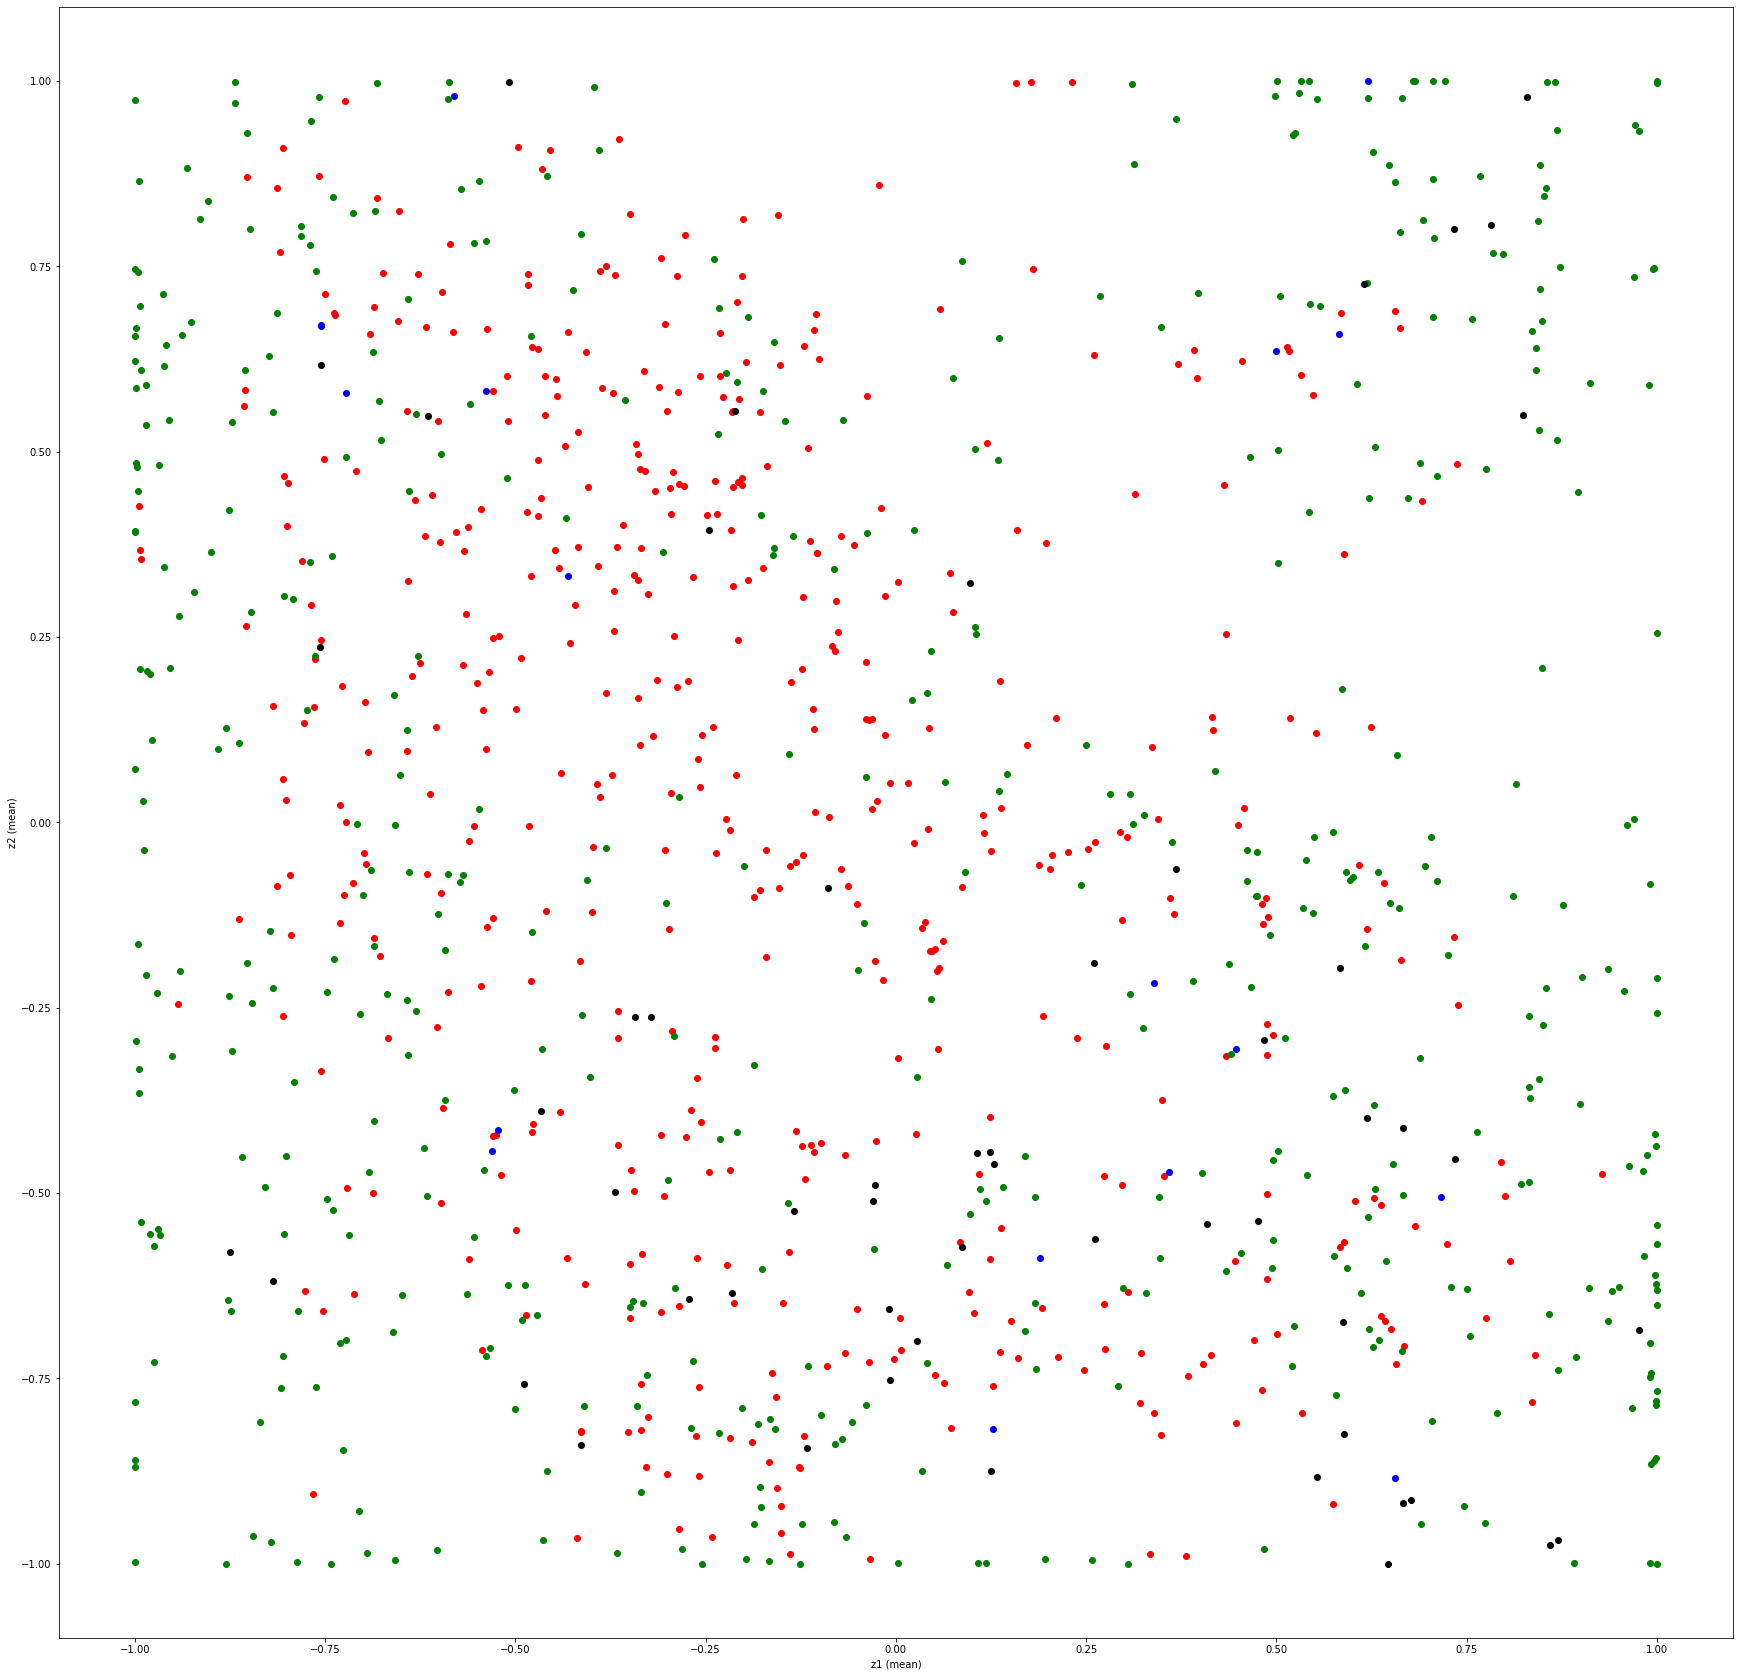

means
[[-0.24537015 -0.47188219]
 [ 0.33389529 -0.98696051]
 [-0.78088114  0.35318593]
 ...
 [ 0.58264445  0.65825206]
 [ 0.44663543 -0.3058523 ]
 [ 0.62014531  0.99984824]]


' \n    # plot the mode of responsibilities\n    modes = model.map_grids[responsibilities.argmax(axis=1), :]\n    #plt.figure(figsize=figure.figaspect(1))\n    plt.figure(figsize= (30, 30))\n    plt.scatter(modes[:, 0], modes[:, 1], c=data_target)\n    #plt.ylim(-1.1, 1.1)\n    #plt.xlim(-1.1, 1.1)\n    plt.xlabel("z1 (mode)")\n    plt.ylabel("z2 (mode)")\n    # ファイルに保存\n    plt.savefig(tokutyou + \'_mode.jpg\')\n    plt.show()\n    #入力データ順にデータを判定\n    #最頻値 ある一群の数値データにおいて、最も頻繁に現れた数値のこと\n    print("modes")\n    print(modes)\n    np.savetxt(tokutyou + \'_modeData.csv\', modes, delimiter=\',\')\n     '

In [16]:
#GTM解析
# https://datachemeng.com/generativetopographicmapping
#https://qiita.com/maskot1977/items/92571ab225b15ca393c5
# -*- coding: utf-8 -*- 
# %reset -f
#"""
#@author: Hiromasa Kaneko
#"""
# Demonstration of GTM 特徴量解析に使用

import pandas as pd
import matplotlib.figure as figure
import matplotlib.pyplot as plt
from dcekit.generative_model import GTM
import numpy as np

# settings
#GTMマップのサイズ。[30, 30] のように list で [縦のサイズ, 横のサイズ] としてください
shape_of_map = [15, 15]
#RBF(基底関数) の数。[10, 10] のように list で [縦の数, 横の数] としてください
shape_of_rbf_centers = [5, 5]
#RBF の分散
variance_of_rbfs = 5
#EM アルゴリズムにおけるラムダ
lambda_in_em_algorithm = 0.01
#EM アルゴリズムにおける繰り返し回数
number_of_iterations = 100
#学習過程表示フラグ
display_flag = 1
smote_path = "C:/Users/k_lab_pc/農薬解析/smote2/"
#特徴量ファイル
tokutyou = smote_path + "kaiseki_3"
#クラス分類
ros =  smote_path + "kaiseki_bunrui_komakaku"

data_set = pd.read_csv( tokutyou + ".csv",sep=",",header=None)
data_target = pd.read_csv( ros + ".csv",sep=",",header=None)
input_dataset = data_set
#color = data_target
#print(color)

# autoscaling
input_dataset = (input_dataset - input_dataset.mean(axis=0)) / input_dataset.std(axis=0, ddof=1)
#NaNを０に変換
input_dataset = input_dataset.fillna(0)
#print(input_dataset)


# construct GTM model
model = GTM(shape_of_map, shape_of_rbf_centers, variance_of_rbfs, lambda_in_em_algorithm, number_of_iterations,
            display_flag)
model.fit(input_dataset)

print(model.success_flag)

colors =  ["r", "g", "k", "b", "c", "y", "m", "orange","pink"]

if model.success_flag:
    # calculate of responsibilities
    responsibilities = model.responsibility(input_dataset)

    # plot the mean of responsibilities
    means = responsibilities.dot(model.map_grids)
    #plt.figure(figsize=figure.figaspect(1))
    plt.figure(figsize=(30, 30))
    
    #plt.scatter(means[:, 0], means[:, 1], c=color)
    #article_list = color[0].unique()
    print(means)
    print(data_target[0])
    print(data_target.iloc[[0]])
    print(type(data_target))
    
    for i , v in enumerate(data_target[0]):
       
        #if v == data_target.iloc[i,0]:
        plt.scatter(means[i, 0],  
                    means[i, 1],
                    label = int(v),
                    color = colors[int(v)-1])

    
    plt.ylim(-1.1, 1.1)
    plt.xlim(-1.1, 1.1)
    plt.xlabel("z1 (mean)")
    plt.ylabel("z2 (mean)")
    print("ファイルに保存 前")
    # ファイルに保存
    plt.savefig(tokutyou + '_mean.jpg') 
    
    plt.show()
    #入力データ順にデータを判定
    #算術平均
    print("means")
    #z1、z2の順に出力
    print(means)
    #"1man_TABAKO_teiROS_new47_smote"
    np.savetxt(tokutyou + '_meanData.csv', means, delimiter=',')
    #np.savetxt('1man_TABAKO_teiROS_new47_smote_meanData.csv', means, delimiter=',')
''' 
    # plot the mode of responsibilities
    modes = model.map_grids[responsibilities.argmax(axis=1), :]
    #plt.figure(figsize=figure.figaspect(1))
    plt.figure(figsize= (30, 30))
    plt.scatter(modes[:, 0], modes[:, 1], c=data_target)
    #plt.ylim(-1.1, 1.1)
    #plt.xlim(-1.1, 1.1)
    plt.xlabel("z1 (mode)")
    plt.ylabel("z2 (mode)")
    # ファイルに保存
    plt.savefig(tokutyou + '_mode.jpg')
    plt.show()
    #入力データ順にデータを判定
    #最頻値 ある一群の数値データにおいて、最も頻繁に現れた数値のこと
    print("modes")
    print(modes)
    np.savetxt(tokutyou + '_modeData.csv', modes, delimiter=',')
     '''